### Install/Download features

In [61]:
import pandas as pd
from demoparser2 import DemoParser
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import clear_output
import demo_analyzer as da
import importlib

importlib.reload(da)

<module 'demo_analyzer' from 'd:\\Nova pasta\\Data-Science-for-Entertainment-Esports\\Demo Analyzer\\demo_analyzer.py'>

In [62]:
# from google.colab import auth

# auth.authenticate_user()  # must authenticate


# '''list all ids of files directly under folder folder_id'''

# def folder_list(folder_id):

#   from googleapiclient.discovery import build

#   gdrive = build('drive', 'v3').files()

#   res = gdrive.list(q="'%s' in parents" % folder_id).execute()

#   return [f['id'] for f in res['files']]



# '''download all files from a gdrive folder to current directory'''

# def folder_download(folder_id):

#   for fid in folder_list(folder_id):

#     !gdown -q $fid

# link='https://drive.google.com/drive/folders/1Hp-GgUR7agVhGA-4B6Y-rueMCmHaWKlA?usp=drive_link'

# folder_id="1Hp-GgUR7agVhGA-4B6Y-rueMCmHaWKlA"

# folder_download(folder_id)

In [63]:
# List files in a specific directory
# file_list = os.listdir("Furia Demos")

# player_coords = pd.DataFrame()
# death_coords = pd.DataFrame()
# spawn_positions = dict()

# for filename in file_list:
#     if filename.endswith('.dem'):
#         filepath = os.path.join('Furia Demos', filename)
#         parser = DemoParser(filepath)

#         print(filename)
#         map_name = parser.parse_header()['map_name']
        
#         new_spawn_positions = get_spawn_positions(parser)

#         new_player_coords = get_player_coords(parser, list(FURIA_IDS.values()), new_spawn_positions)
#         map_series = pd.Series([map_name for i in range(new_player_coords.shape[0])], name="map_name")
#         new_player_coords = pd.concat([new_player_coords, map_series], axis=1)

#         new_death_coords = get_death_coords(parser, list(FURIA_IDS.values()),map_name)
#         map_series = pd.Series([map_name for i in range(new_death_coords.shape[0])], name="map_name")
#         new_death_coords = pd.concat([new_death_coords, map_series], axis=1)
    
#         spawn_positions[map_name] = new_spawn_positions
#         player_coords = pd.concat([player_coords,new_player_coords], axis=0).dropna()
#         death_coords = pd.concat([death_coords,new_death_coords], axis=0).dropna()

### Demo instancing

In [5]:
parser = DemoParser("Furia Demos\\furia-vs-legacy-m3-mirage.dem")

In [55]:
parser.parse_ticks(wanted_props=['X', 'Y', 'team_num'])

,team_num,X,Y,tick,steamid,name
0,3.0,-1656.000000,-1800.000000,0,76561197960690195,FalleN
1,3.0,-1776.000000,-1976.000000,0,76561198164970560,yuurih
2,3.0,-1720.000000,-1896.000000,0,76561198058500492,KSCERATO
3,2.0,1136.000000,32.000000,0,76561198194325317,dumau
4,2.0,1136.000000,-64.000000,0,76561198074017668,lux
...,...,...,...,...,...,...
1612775,3.0,-446.753662,-1678.057007,161277,76561198061763596,n1ssim
1612776,3.0,-1179.421631,-714.227844,161277,76561198100494962,saadzin
1612777,3.0,-517.515320,-1541.554565,161277,76561198850020186,latto
1612778,2.0,-806.378296,-870.316772,161277,76561198134401925,YEKINDAR


In [64]:
analyzer = da.Analyzer(parser)

### Generating heatmap

In [65]:
players_coords = analyzer.get_player_coords(verbose=True)
players_coords

Getting coordinates
Dropping NA's values...
Tagging by Half...
Tagging by Side...
Tagging by round...
Tagging by Floor...
Filtering warmup ticks...
Filtering after game ticks...
Normalizing...
Done!


,is_bomb_planted,team_num,is_alive,tick,name,half,side,round,floor,X,Y
17000,False,3.0,True,1700,FalleN,1,CT,1,1,314.839294,702.654419
17001,False,3.0,True,1700,yuurih,1,CT,1,1,290.855652,737.837524
17002,False,3.0,True,1700,KSCERATO,1,CT,1,1,302.046051,721.848816
17003,False,2.0,True,1700,dumau,1,T,1,1,873.195312,336.266968
17004,False,2.0,True,1700,lux,1,T,1,1,873.206848,355.430603
...,...,...,...,...,...,...,...,...,...,...,...
1586065,True,3.0,False,158606,n1ssim,2,CT,18,1,556.649292,678.211426
1586066,True,3.0,False,158606,saadzin,2,CT,18,1,410.115662,485.445557
1586067,True,3.0,False,158606,latto,2,CT,18,1,542.496948,650.910950
1586068,True,2.0,False,158606,YEKINDAR,2,T,18,1,484.724304,516.663391


In [66]:
players_coords.loc[players_coords['name'] == 'FalleN']

,is_bomb_planted,team_num,is_alive,tick,name,half,side,round,floor,X,Y
17000,False,3.0,True,1700,FalleN,1,CT,1,1,314.839294,702.654419
17010,False,3.0,True,1701,FalleN,1,CT,1,1,314.906036,702.746826
17020,False,3.0,True,1702,FalleN,1,CT,1,1,315.000183,702.877258
17030,False,3.0,True,1703,FalleN,1,CT,1,1,315.121796,703.045593
17040,False,3.0,True,1704,FalleN,1,CT,1,1,315.270844,703.251953
...,...,...,...,...,...,...,...,...,...,...,...
1586020,True,2.0,False,158602,FalleN,2,T,18,1,591.265015,781.639221
1586030,True,2.0,False,158603,FalleN,2,T,18,1,591.265015,781.639221
1586040,True,2.0,False,158604,FalleN,2,T,18,1,591.265015,781.639221
1586050,True,2.0,False,158605,FalleN,2,T,18,1,591.265015,781.639221


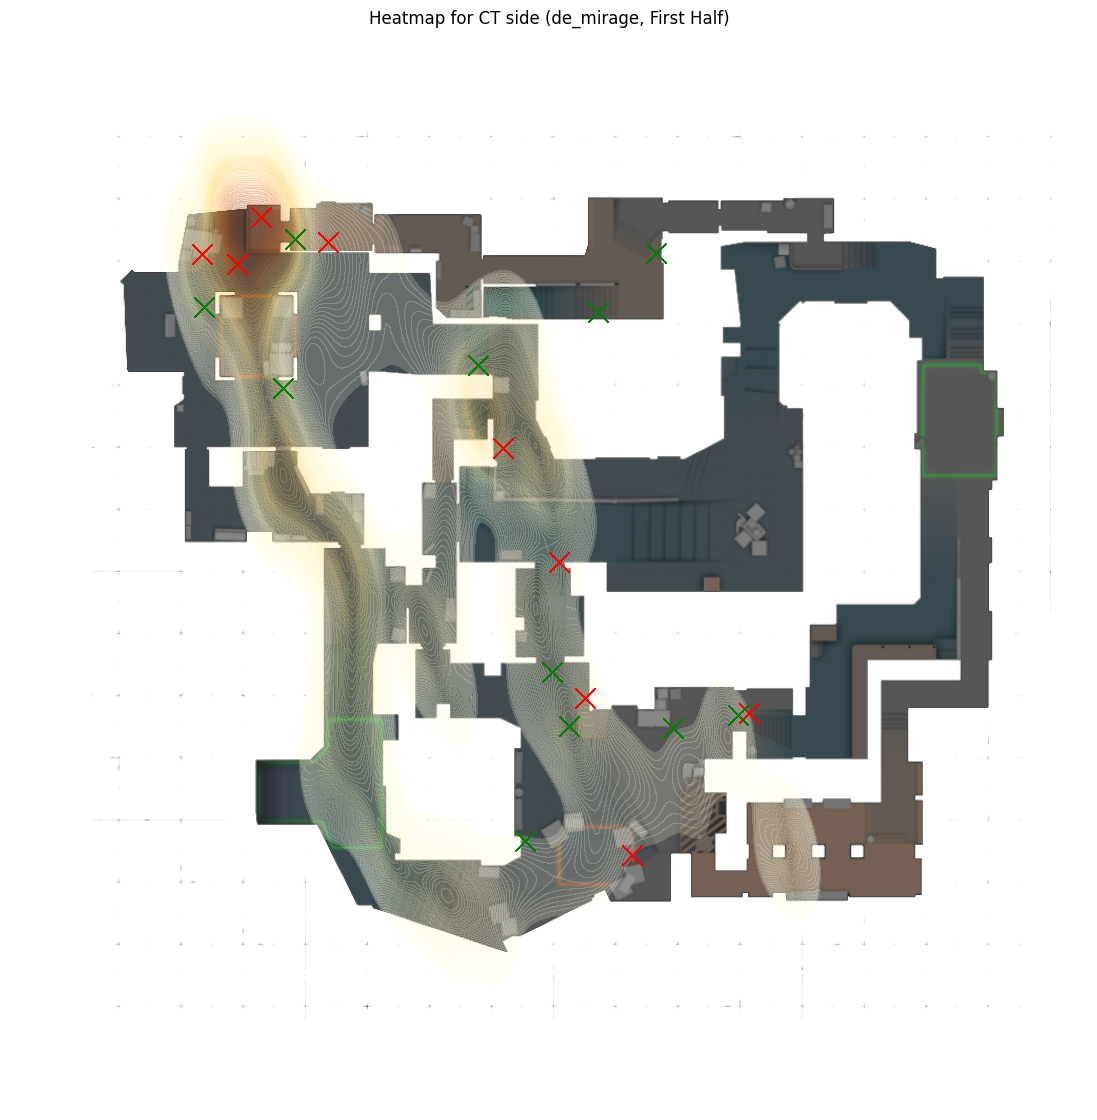

In [67]:
analyzer.map_analysis(players_coords,names=["FalleN"],lower_limit=0,upper_limit=0,half=0,side='CT',heatmap=True, deaths=True,kills=True,bomb_plt=False)